## Kiva - Geographic Visualization: 

1. Import libraries and data
    a. Upload a shapefile containing location data
2. Wrangle the data to meet the needs of the analysis
3. Merge the two data files into a single GeoDataFrame
4. Clean the merged GeoDataFrame
5. Create a choropleth map using a variable
6. Discuss the results
7. Submit

<b>1. Import libraries and data </b>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
import os 
import geopandas as gpd
import geoplot

In [2]:
# Command: Prompt matplotlib visuals to appear in the notebook. 

%matplotlib inline

In [3]:
# Define path.

path = r'/Users/admin/Desktop/Kiva Data Analysis'

In [4]:
path

'/Users/admin/Desktop/Kiva Data Analysis'

<b>1a. Upload a shape file containing location data</b>

In [5]:
# Import ".shp" file for the world shape outline using the Geopandas 'read_csv' command. 

world = gpd.read_file(os.path.join(path, '02 Data', 'Shape Files', 'World_Countries', 'World_Countries.shp'))

In [6]:
# View the new GeoDataFrame. 

world.head(20)

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
5,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472..."
6,Armenia,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38..."
7,Andorra,"POLYGON ((1.44583 42.60194, 1.48653 42.65041, ..."
8,Angola,"MULTIPOLYGON (((13.09139 -4.63306, 13.09264 -4..."
9,American Samoa (US),"POLYGON ((-170.74390 -14.37556, -170.74942 -14..."


In [7]:
# Import a Pickle file of Kiva's regions data. 

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'kiva_loan_theme_region_cleaned.pkl'))

In [10]:
df.head(20)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
5,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,62225,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
6,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000007VvXr,Solar Home Systems,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,1300,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
7,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000weyk,General,Cambodia,No,Kampong Chhnang Province,"(12.0, 104.5)",KHM,...,237175,"Kampong Chhnang Province, Cambodia","[(12.1392352, 104.5655273)]",Kampong Chhnang Province; Cambodia,"(12.1392352, 104.5655273)",12.139235,104.565527,"Kampong Chhnang, Cambodia","(12.1392352, 104.5655273)",90.0
8,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000007VvXr,Solar Home Systems,Cambodia,No,Kampong Chhnang Province,"(12.0, 104.5)",KHM,...,3050,"Kampong Chhnang Province, Cambodia","[(12.1392352, 104.5655273)]",Kampong Chhnang Province; Cambodia,"(12.1392352, 104.5655273)",12.139235,104.565527,"Kampong Chhnang, Cambodia","(12.1392352, 104.5655273)",90.0
9,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Kampong Chhnang Province,"(12.0, 104.5)",KHM,...,31425,"Kampong Chhnang Province, Cambodia","[(12.1392352, 104.5655273)]",Kampong Chhnang Province; Cambodia,"(12.1392352, 104.5655273)",12.139235,104.565527,"Kampong Chhnang, Cambodia","(12.1392352, 104.5655273)",90.0


In [8]:
df.columns

Index(['Partner ID', 'Field Partner Name', 'sector', 'Loan Theme ID',
       'Loan Theme Type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

In [9]:
df.shape

(15736, 21)

<b>2. Data wrangling and merging</b>

In [10]:
# Select only the necessary columns and put them in a list called column (since there's only one). 

column = ["country"]

In [11]:
column

['country']

In [12]:
# Create a subset. 

world_kiva = df[column]

In [13]:
world_kiva.head()

,country
0,Cambodia
1,Cambodia
2,Cambodia
3,Cambodia
4,Cambodia


In [14]:
type(world_kiva)

pandas.core.frame.DataFrame

In [15]:
# View countries where kiva loans are located by finding unique strings in "country" column.

world_kiva['country'].unique()

array(['Cambodia', 'Samoa', 'Mozambique', 'Ukraine', 'Azerbaijan',
       'Cameroon', 'Mongolia', 'Dominican Republic', 'Bolivia',
       'Guatemala', 'Sierra Leone', 'Paraguay', 'Nepal', 'Tajikistan',
       'Uganda', 'Lebanon', 'Palestine', 'El Salvador', 'Indonesia',
       'Tanzania', 'Peru', 'Nicaragua', 'Senegal', 'Rwanda', 'Honduras',
       'Vietnam', 'Philippines', 'Costa Rica', 'Panama', 'Mexico',
       'United States', 'Kenya', 'Ecuador', 'Armenia', 'Colombia',
       'The Democratic Republic of the Congo', 'Burundi', 'Kyrgyzstan',
       'Israel', 'Georgia', 'Liberia', 'Jordan', 'Burkina Faso', 'Turkey',
       'Yemen', 'Malawi', 'Zambia', 'South Africa', 'Ghana', 'India',
       'Thailand', 'Brazil', 'Haiti', 'Albania', 'Kosovo', 'Timor-Leste',
       'Pakistan', 'Belize', 'Nigeria', 'Togo', 'Suriname', 'Mali',
       'Zimbabwe', 'Madagascar', 'Somalia', 'Myanmar (Burma)',
       "Lao People's Democratic Republic", 'Solomon Islands', 'China',
       'Afghanistan', 'Moldov

In [16]:
world_kiva

,country
0,Cambodia
1,Cambodia
2,Cambodia
3,Cambodia
4,Cambodia
...,...
15731,South Africa
15732,Kenya
15733,Uganda
15734,Canada


<b>Merge dataframes into a single Geodataframe</b>

In [18]:
# Merge both dataframes on the "country" column. 
# Note: Merge the df DataFrame INTO the world GeoDataFrame 
# so the output will be a GeoDataFrame, and not a pandas DataFrame.

world_m = world.merge(df, on = 'country', how = 'outer', indicator = True)

KeyError: 'country'

Notes: I need to fix "COUNTRY" column in world to match "country" column in df using a rename command.

In [19]:
# Rename the "COUNTRY" column of world: "country"

world.rename(columns = {'COUNTRY' : 'country'}, inplace = True)

In [20]:
world.columns

Index(['country', 'geometry'], dtype='object')

In [21]:
world.head()

,country,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [22]:
# Merge both dataframes on the "country" column. 
# Note: Merge the df DataFrame INTO the world GeoDataFrame 
# so the output will be a GeoDataFrame, and not a pandas DataFrame.

world_m = world.merge(df, on = 'country', how = 'outer', indicator = True)

In [23]:
world_m

,country,geometry,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,forkiva,region,geocode_old,...,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct,_merge
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",412.0,The Alliance for Artisan Enterprise at The Asp...,Artisan,a1050000003vgYo,Artisan,No,Kandahar City,NaN,...,"Kandahar City, Afghanistan","[(31.628871, 65.7371749)]",Kandahar; Kandahar; Kandahar; Afghanistan,"(31.628871, 65.7371749)",31.628871,65.737175,"Kandahar, Afghanistan","(31.628871, 65.7371749)",NaN,both
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",30.0,Komak Credit Union,General Financial Inclusion,a1050000000sg5u,Vulnerable Populations,No,"Baku, city",NaN,...,"Baku, city, Azerbaijan","[(40.40926169999999, 49.8670924)]",Baku; Baku; Azerbaijan,"(40.40926169999999, 49.8670924)",40.409262,49.867092,AZE,NaN,85.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,Myanmar (Burma),None,485.0,Building Markets,SME Financial Inclusion,a1050000007S5Kt,SME,Yes,Yangon,NaN,...,"Yangon, Myanmar (Burma)","[(16.8660694, 96.19513200000002)]",Yangon; Yangon Region; Myanmar (Burma),"(16.8660694, 96.19513200000002)",16.866069,96.195132,"Yangon, Myanmar","(16.8660694, 96.19513200000002)",NaN,right_only
15912,Myanmar (Burma),None,545.0,"N/A, direct to Solar Home",DSE Direct,a1050000008ASxg,Solar Home Systems,No,Yangon,NaN,...,"Yangon, Myanmar (Burma)","[(16.8660694, 96.19513200000002)]",Yangon; Yangon Region; Myanmar (Burma),"(16.8660694, 96.19513200000002)",16.866069,96.195132,"Yangon, Myanmar","(16.8660694, 96.19513200000002)",NaN,right_only
15913,Lao People's Democratic Republic,None,393.0,TerraClear Development,Water and Sanitation,a1050000003w8dR,End Consumer Finance,Yes,Laos,NaN,...,"Laos, Lao People's Democratic Republic","[(19.85627, 102.495496)]",Laos,"(19.85627, 102.495496)",19.856270,102.495496,"Luangprabang, Lao People's Democratic Republic","(20.0656229, 102.6216211)",90.0,right_only
15914,Lao People's Democratic Republic,None,393.0,TerraClear Development,Water and Sanitation,a1050000003w8bp,Distributor Finance,Yes,Laos,NaN,...,"Laos, Lao People's Democratic Republic","[(19.85627, 102.495496)]",Laos,"(19.85627, 102.495496)",19.856270,102.495496,"Luangprabang, Lao People's Democratic Republic","(20.0656229, 102.6216211)",90.0,right_only


In [25]:
world_m.columns

Index(['country', 'geometry', 'Partner ID', 'Field Partner Name', 'sector',
       'Loan Theme ID', 'Loan Theme Type', 'forkiva', 'region', 'geocode_old',
       'ISO', 'number', 'amount', 'LocationName', 'geocode', 'names', 'geo',
       'lat', 'lon', 'mpi_region', 'mpi_geo', 'rural_pct', '_merge'],
      dtype='object')

In [26]:
# Ensure "world_m" is a GeoDataFrame. 

type(world_m)

geopandas.geodataframe.GeoDataFrame

In [27]:
world_m.shape

(15916, 23)

In [28]:
world_m['_merge'].value_counts()

both          15228
right_only      508
left_only       180
Name: _merge, dtype: int64

Notes: There are some missing data (508 rows in right_only and 180 rows in left_only). 

In [30]:
world_m.head(20)

,country,geometry,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,forkiva,region,geocode_old,...,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct,_merge
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",412.0,The Alliance for Artisan Enterprise at The Asp...,Artisan,a1050000003vgYo,Artisan,No,Kandahar City,NaN,...,"Kandahar City, Afghanistan","[(31.628871, 65.7371749)]",Kandahar; Kandahar; Kandahar; Afghanistan,"(31.628871, 65.7371749)",31.628871,65.737175,"Kandahar, Afghanistan","(31.628871, 65.7371749)",NaN,both
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",30.0,Komak Credit Union,General Financial Inclusion,a1050000000sg5u,Vulnerable Populations,No,"Baku, city",NaN,...,"Baku, city, Azerbaijan","[(40.40926169999999, 49.8670924)]",Baku; Baku; Azerbaijan,"(40.40926169999999, 49.8670924)",40.409262,49.867092,AZE,NaN,85.0,both
5,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",30.0,Komak Credit Union,General Financial Inclusion,a1050000000sg5u,Vulnerable Populations,No,"Baku, region",NaN,...,"Baku, region, Azerbaijan","[(40.585092, 49.66670269999999)]",Baku; Sumqayit; Sumqayit; Azerbaijan; AZ5006,"(40.585092, 49.66670269999999)",40.585092,49.666703,AZE,NaN,85.0,both
6,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",30.0,Komak Credit Union,General Financial Inclusion,a1050000000sg5u,Vulnerable Populations,No,Fuzuli region,NaN,...,"Fuzuli region, Azerbaijan","[(39.6024762, 47.1523402)]",Fuzuli District; Jabrayil; Azerbaijan,"(39.6024762, 47.1523402)",39.602476,47.152340,AZE,NaN,85.0,both
7,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",56.0,Aqroinvest Credit Union,General Financial Inclusion,a1050000004Wofc,Health,Yes,Agdas,NaN,...,"Agdas, Azerbaijan","[(40.6335427, 47.467431)]",Aghdash; Agdash; Azerbaijan,"(40.6335427, 47.467431)",40.633543,47.467431,AZE,NaN,96.0,both
8,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",56.0,Aqroinvest Credit Union,General Financial Inclusion,a1050000000wezR,General,No,Agdas,NaN,...,"Agdas, Azerbaijan","[(40.6335427, 47.467431)]",Aghdash; Agdash; Azerbaijan,"(40.6335427, 47.467431)",40.633543,47.467431,AZE,NaN,96.0,both
9,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",56.0,Aqroinvest Credit Union,General Financial Inclusion,a1050000000QbWl,Higher Education,No,Baku,"(40.3952778, 49.8822222)",...,"Baku, Azerbaijan","[(40.40926169999999, 49.8670924)]",Baku; Baku; Azerbaijan,"(40.40926169999999, 49.8670924)",40.409262,49.867092,AZE,NaN,96.0,both


Notes: I suspect the missing values from left_only and right_only are due to names of countries. For instance, there is no loans with kiva in Alegria. The world GeoDataFrame includes ALL countries. Kiva loans exist in select countries (refer to line 15). 

Countries where kiva loans are present: <br>
'Cambodia', 'Samoa', 'Mozambique', 'Ukraine', 'Azerbaijan','Cameroon', 'Mongolia', 'Dominican Republic', 'Bolivia','Guatemala', 'Sierra Leone', 'Paraguay', 'Nepal', 'Tajikistan','Uganda', 'Lebanon', 'Palestine', 'El Salvador', 'Indonesia','Tanzania', 'Peru', 'Nicaragua', 'Senegal', 'Rwanda', 'Honduras','Vietnam', 'Philippines', 'Costa Rica', 'Panama', 'Mexico','United States', 'Kenya', 'Ecuador', 'Armenia', 'Colombia','The Democratic Republic of the Congo', 'Burundi', 'Kyrgyzstan','Israel', 'Georgia', 'Liberia', 'Jordan', 'Burkina Faso', 'Turkey','Yemen', 'Malawi', 'Zambia', 'South Africa', 'Ghana', 'India','Thailand', 'Brazil', 'Haiti', 'Albania', 'Kosovo', 'Timor-Leste','Pakistan', 'Belize', 'Nigeria', 'Togo', 'Suriname', 'Mali','Zimbabwe', 'Madagascar', 'Somalia', 'Myanmar (Burma)',"Lao People's Democratic Republic", 'Solomon Islands', 'China','Afghanistan', 'Moldova', 'Namibia', 'Egypt', 'Lesotho',"Cote D'Ivoire", 'Benin', 'South Sudan', 'Bhutan', 'Canada'

<b>3. Data cleaning</b>

In [31]:
# Check for missing values. 

world_m.isnull().sum()

country                   0
geometry                508
Partner ID              180
Field Partner Name      180
sector                  180
Loan Theme ID           180
Loan Theme Type         180
forkiva                 180
region                  180
geocode_old           14716
ISO                     194
number                  180
amount                  180
LocationName            180
geocode                2254
names                  2255
geo                     180
lat                    2254
lon                    2254
mpi_region              194
mpi_geo                6245
rural_pct              1572
_merge                    0
dtype: int64

Notes: The key column to look for missing values is "country". There is none, so this is good news. Next thing to do is check for duplicates or mispellings to ensure all select countries with kiva loans are accounted for in the merge.

In [34]:
world_m['country'].unique()

array(['Aruba (Netherlands)', 'Antigua and Barbuda', 'Afghanistan',
       'Algeria', 'Azerbaijan', 'Albania', 'Armenia', 'Andorra', 'Angola',
       'American Samoa (US)', 'Argentina', 'Australia', 'Austria',
       'Anguilla (UK)', 'Antarctica', 'Bahrain', 'Barbados', 'Botswana',
       'Bermuda (UK)', 'Belgium', 'Bahamas', 'Bangladesh', 'Belize',
       'Bosnia and Herzegovina', 'Bolivia', 'Myanmar', 'Benin', 'Belarus',
       'Solomon Islands', 'Brazil', 'Bhutan', 'Bulgaria',
       'Bouvet Island (Norway)', 'Brunei', 'Burundi', 'Canada',
       'Cambodia', 'Chad', 'Sri Lanka', 'Congo',
       'Democratic Republic of the Congo', 'China', 'Chile',
       'Cayman Islands (UK)', 'Cocos (Keeling) Islands (Australia)',
       'Cameroon', 'Comoros', 'Colombia', 'Northern Mariana Islands (US)',
       'Costa Rica', 'Central African Republic', 'Cuba', 'Cape Verde',
       'Cook Islands (New Zealand)', 'Cyprus', 'Denmark', 'Djibouti',
       'Dominica', 'Jarvis Island (US)', 'Dominican Repu

Notes: There are some spelling variations in select countries. 
- The Democractic Republic of Congo 
- Myanmar (Burma)
- Lao People's Democractic Republic 
- South Sudan 

Rename aforementioned countries to match the spelling of same-name countries:  
- Democractic Republic of Congo 
- Myanmar 
- Laos
- Sudan 


In [36]:
# Rename values of select countries in "country" column. 
# Note: The syntax is as follows: 
# df['column name'] = df['column name'].replace(['old value'],'new value')

df['country'] = df['country'].replace(['The Democractic Republic of Congo'],'Democractic Republic of Congo')
df['country'] = df['country'].replace(['Myanmar (Burma)'],'Myanmar')
df['country'] = df['country'].replace(["Lao People's Democractic Republic"],'Lao')
df['country'] = df['country'].replace(['South Sudan'],'Sudan')

In [38]:
df['country'].unique()

array(['Cambodia', 'Samoa', 'Mozambique', 'Ukraine', 'Azerbaijan',
       'Cameroon', 'Mongolia', 'Dominican Republic', 'Bolivia',
       'Guatemala', 'Sierra Leone', 'Paraguay', 'Nepal', 'Tajikistan',
       'Uganda', 'Lebanon', 'Palestine', 'El Salvador', 'Indonesia',
       'Tanzania', 'Peru', 'Nicaragua', 'Senegal', 'Rwanda', 'Honduras',
       'Vietnam', 'Philippines', 'Costa Rica', 'Panama', 'Mexico',
       'United States', 'Kenya', 'Ecuador', 'Armenia', 'Colombia',
       'The Democratic Republic of the Congo', 'Burundi', 'Kyrgyzstan',
       'Israel', 'Georgia', 'Liberia', 'Jordan', 'Burkina Faso', 'Turkey',
       'Yemen', 'Malawi', 'Zambia', 'South Africa', 'Ghana', 'India',
       'Thailand', 'Brazil', 'Haiti', 'Albania', 'Kosovo', 'Timor-Leste',
       'Pakistan', 'Belize', 'Nigeria', 'Togo', 'Suriname', 'Mali',
       'Zimbabwe', 'Madagascar', 'Somalia', 'Myanmar',
       "Lao People's Democratic Republic", 'Solomon Islands', 'China',
       'Afghanistan', 'Moldova', 'Nam

<b>Duplicates check</b>

In [48]:
dups = world_m.duplicated()

In [49]:
dups.shape #No dups

(15916,)

<b>Extreme value checks</b>

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

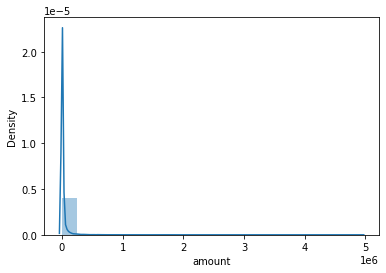

In [50]:
sns.distplot(world_m['amount'], bins=20)

Notes: This shows extreme values for "amount"

In [53]:
# Check how many extreme values. 

world_m[world_m['amount'] >100000]

,country,geometry,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,forkiva,region,geocode_old,...,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct,_merge
14,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",56.0,Aqroinvest Credit Union,General Financial Inclusion,a1050000000TGYU,Vulnerable Populations,No,Bilasuvar,"(39.5, 48.4166667)",...,"Bilasuvar, Azerbaijan","[(39.5396107, 48.45467259999999)]",Bilasuvar; Ardabil Province; Azerbaijan,"(39.5396107, 48.45467259999999)",39.539611,48.454673,AZE,NaN,96.0,both
19,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",239.0,Agro & Social Fund,General Financial Inclusion,a1050000000sjDY,Underserved,No,Elbasan,NaN,...,"Elbasan, Albania","[(41.11023, 20.0866554)]",Elbasan; Elbasan County; Elbasan County; Albania,"(41.11023, 20.0866554)",41.110230,20.086655,ALB,NaN,69.0,both
20,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",239.0,Agro & Social Fund,General Financial Inclusion,a1050000000SyQ9,Vulnerable Populations,No,Korce,NaN,...,"Korce, Albania","[(40.6140785, 20.7778071)]",KorÍ_Íä; KorÍ_Íä District; KorÍ_Íä County; Alb...,"(40.6140785, 20.7778071)",40.614078,20.777807,ALB,NaN,69.0,both
22,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",239.0,Agro & Social Fund,General Financial Inclusion,a1050000000sjDY,Underserved,No,Korce,NaN,...,"Korce, Albania","[(40.6140785, 20.7778071)]",KorÍ_Íä; KorÍ_Íä District; KorÍ_Íä County; Alb...,"(40.6140785, 20.7778071)",40.614078,20.777807,ALB,NaN,69.0,both
24,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",239.0,Agro & Social Fund,General Financial Inclusion,a1050000000sjDY,Underserved,No,Lac,NaN,...,"Lac, Albania","[(41.6412644, 19.705595)]",LaÍ_; Kurbin District; LezhÍä County; Albania,"(41.6412644, 19.705595)",41.641264,19.705595,ALB,NaN,69.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15899,Myanmar (Burma),None,416.0,Proximity Designs,General Financial Inclusion,a1050000002ZLVh,Community Impact Loan,Yes,Monywa,NaN,...,"Monywa, Myanmar (Burma)","[(22.1215513, 95.15363269999999)]",Monywa; Sagaing Region; Myanmar (Burma),"(22.1215513, 95.15363269999999)",22.121551,95.153633,"Sagaing, Myanmar","(21.9159702, 95.9621106)",100.0,right_only
15905,Myanmar (Burma),None,416.0,Proximity Designs,General Financial Inclusion,a1050000002ZLVh,Community Impact Loan,Yes,Pakokku,NaN,...,"Pakokku, Myanmar (Burma)","[(21.3394161, 95.07027939999999)]",Pakokku; Pakokku; Magway Region; Myanmar (Burma),"(21.3394161, 95.07027939999999)",21.339416,95.070279,"Sagaing, Myanmar","(21.9159702, 95.9621106)",100.0,right_only
15906,Myanmar (Burma),None,416.0,Proximity Designs,General Financial Inclusion,a1050000002ZLVh,Community Impact Loan,Yes,Pyapon,NaN,...,"Pyapon, Myanmar (Burma)","[(16.2850333, 95.67998159999999)]",Pyapon; Pyapon; Ayeyarwady; Myanmar (Burma),"(16.2850333, 95.67998159999999)",16.285033,95.679982,"Yangon, Myanmar","(16.8660694, 96.19513200000002)",100.0,right_only
15909,Myanmar (Burma),None,481.0,Entrepreneurs du Monde - Sont Oo Tehtwin,General Financial Inclusion,a1050000006TnmH,Agriculture,No,Dala Township,NaN,...,"Dala Township, Myanmar (Burma)","[(16.7559046, 96.1473964)]",Dala; Yangon Region; Myanmar (Burma),"(16.7559046, 96.1473964)",16.755905,96.147396,"Yangon, Myanmar","(16.8660694, 96.19513200000002)",31.0,right_only


In [54]:
world_m.describe()

,Partner ID,number,amount,lat,lon,rural_pct
count,15736.000000,15736.000000,1.573600e+04,13662.000000,13662.000000,14344.000000
mean,191.376144,53.628432,2.003991e+04,14.328878,29.433569,68.084635
std,118.705003,403.079799,9.636941e+04,16.757689,83.255739,26.550064
min,9.000000,1.000000,2.500000e+01,-34.610548,-172.790661,0.000000
25%,123.000000,1.000000,9.500000e+02,6.266728,-71.967463,60.000000
50%,154.000000,4.000000,2.600000e+03,13.484102,41.899993,73.000000
75%,217.000000,15.000000,8.750000e+03,22.189940,106.677321,85.000000
max,545.000000,22538.000000,4.929900e+06,51.314017,159.972900,100.000000


In [55]:
world_m['amount'].describe()

count    1.573600e+04
mean     2.003991e+04
std      9.636941e+04
min      2.500000e+01
25%      9.500000e+02
50%      2.600000e+03
75%      8.750000e+03
max      4.929900e+06
Name: amount, dtype: float64

Notes: I'm not sure what the numbers here means; the numbers are not whole numbers. However, it might be helpful to look at what the loans are used for to get a sense of how much is borrowed for what. 

In [57]:
# View reasons for a loan in select countries to justify amount of loans.

world_m['Loan Theme Type'].unique()

array([nan, 'Artisan', 'Vulnerable Populations', 'Health', 'General',
       'Higher Education', 'Water', 'Community Impact Loan',
       'Underserved', 'Startup', 'SME', 'Rural Inclusion', 'Youth',
       'Education', 'First/Second Chance', 'Agriculture (Women)',
       'Conflict Zone', 'Clean Energy', 'Solar Home Systems',
       'Agriculture', 'Disaster Recovery', 'Reduced Interest Rate',
       'Village Bank', 'Housing Improvement',
       'Primary/Secondary Education', 'Sanitation', 'Green',
       'Water and Sanitation', 'Microfranchise',
       'Human Capital Contracts', 'Education - Cambodia',
       'Women Entrepreneurs', 'Extreme Poverty', 'Single mothers',
       'Unbanked', 'Youth Entrepreneurship',
       'Control Group - Research Study', 'Flexible loan conditions',
       'Flexible loan with reduced interest', 'Displaced Populations',
       'Displaced Populations2', 'Business Development Services',
       'Female headed households', 'Senior Citizens',
       'Women in ag

Notes: I see potential groupings of reasons as flags for further analysis in another task. Some examples: women, refugees, education.  

<b>Saving the GeoDataFrame</b>

In [58]:
world_m.drop(columns = '_merge', inplace = True)
# It's necessary to drop the categorical column; otherwise, the 'to_file' function breaks.

In [60]:
out = r'/Users/admin/Desktop/Kiva Data Analysis/02 Data/Shape Files/World Kiva.shp'
world_m.to_file(out)

# Plotting a choropleth
<br>

<b>A. Using Geoplot</b>

ValueError: Axis limits cannot be NaN or Inf

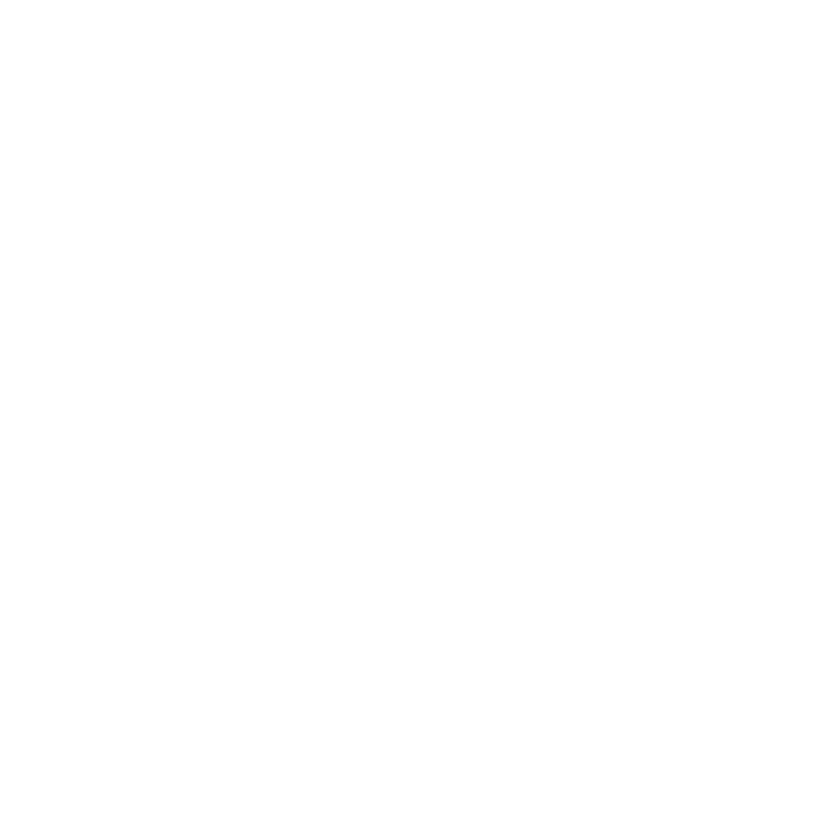

In [62]:
gp = geoplot.choropleth(
    world_m, hue = world_m['amount'], scheme = None,
    cmap ='Reds', figsize=(15,15)
)

<b>Note: Refer to Tableau for visualizations. </b>